# Lab 7 - Pandas 1

In [2]:
import numpy as np
import pandas as pd
from numpy import random as rand
from matplotlib import pyplot as plt

### Problem 1

In [16]:
x = np.linspace(0, 50, 26)
y = x**2 - 1
p_1 = pd.Series(y, index=x)

Bool=np.zeros(26)
for i in range(25):
    if x[i] % 3 == 0:
        Bool[i] = 1

p_1[Bool==1] = 0
print(p_1)

0.0        0.0
2.0        3.0
4.0       15.0
6.0        0.0
8.0       63.0
10.0      99.0
12.0       0.0
14.0     195.0
16.0     255.0
18.0       0.0
20.0     399.0
22.0     483.0
24.0       0.0
26.0     675.0
28.0     783.0
30.0       0.0
32.0    1023.0
34.0    1155.0
36.0       0.0
38.0    1443.0
40.0    1599.0
42.0       0.0
44.0    1935.0
46.0    2115.0
48.0       0.0
50.0    2499.0
dtype: float64


### Problem 2

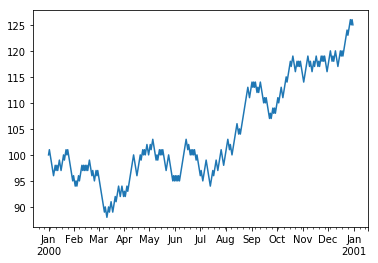

In [54]:
def p_2(p, d=100):
    dateindex = pd.date_range('1/1/2000', '12/31/2000', freq='D')
    stockval = pd.Series(np.zeros(len(dateindex)), index = dateindex)
    stockval[0] = d
    stockvalcum = pd.Series(np.zeros(len(dateindex)), index = dateindex)
    stockvalcum[0] = d
    add = 0
    for i in range(1,len(dateindex)):
        success = rand.binomial(1, p)
        if success == 0:
            add = -1
        else:
            add = 1
        stockval[i] = add
    stockvalcum = stockval.cumsum()
    return stockvalcum

output_2 = p_2(0.5, 100)
output_2.plot(kind='line')


### Problem 3

In [62]:
#Get data

name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', 'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age,'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major})

studentInfo[(studentInfo['Age']>19)&(studentInfo['Sex']=='M')][['ID', 'Name']]


,ID,Name
0,0,Mylan
6,6,Matt


### Problem 4

In [64]:
pd.merge(studentInfo, otherInfo, on='ID')[(studentInfo['Sex']=='M')][['ID', 'Age', 'GPA']]

,ID,Age,GPA
0,0,20,3.8
2,2,18,3.0
4,4,19,2.8
6,6,20,3.8
7,7,19,3.4


### Problem 5

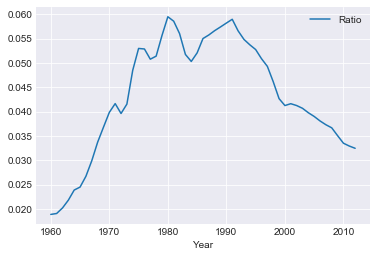

In [103]:
crimedata = pd.read_csv('crime_data.txt', skiprows=1, index_col=0)

crimedata['Ratio'] = pd.Series(crimedata.Total/crimedata.Population, index = crimedata.index)

crimedata.plot(y='Ratio')


In [104]:
mostcrim = crimedata.sort_values(by=['Ratio'], ascending=False)
mostcrim_5 = mostcrim[:5]['Ratio']
mostcrim_5

Year
1980    0.059500
1991    0.058978
1981    0.058582
1990    0.058203
1989    0.057410
Name: Ratio, dtype: float64

In [109]:
avg_burg = np.mean(crimedata['Burglary'][:-4])
avg_total = np.mean(crimedata['Total'][:-4])
print(avg_burg, avg_total)

2469234.1224489794 10658002.102040816


In [124]:
print(crimedata.index[(crimedata['Total']<avg_total)&(crimedata['Burglary']>avg_burg)][:])

Int64Index([1973, 1974], dtype='int64', name='Year')


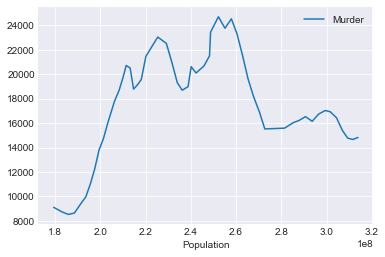

In [127]:
crimedata.plot(x='Population', y='Murder')

In [132]:
tocsv = crimedata[(crimedata.index<1990)&(crimedata.index>=1980)][['Population', 'Violent', 'Robbery']]
tocsv.to_csv('crime_subset.csv')

### Problem 6

In [40]:
#Import data

titanic_1 = pd.read_csv('titanic.csv')
titanic = pd.DataFrame(titanic_1, columns = ['Pclass', 'Survived', 'Name', 'Sex', 'Age', 'Sibsp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Boat', 'Body', 'home.dest'])

import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Accent')


In [41]:
titanic = titanic.drop(['Sibsp', 'Parch', 'Cabin', 'Boat', 'Body', 'home.dest'], axis=1)


In [61]:
titanic = titanic.dropna(0, subset=['Survived'])

titanic['Survived'].replace(1, True, inplace=True)
titanic['Survived'].replace(0, False, inplace=True)

avg_age = np.mean(titanic.Age)
titanic['Age'].fillna(avg_age, inplace=True)

titanic.to_csv('titanic_clean.csv')



In [65]:
#How many people survived?

titanic['Survived'][titanic['Survived']==True].count()

500

In [67]:
#What percentage of passengers survived?

500/titanic['Survived'].count()

0.3819709702062643

In [70]:
#What was the average price of a ticket?

titanic['Fare'].mean()

33.29547928134572

In [72]:
#What was the most expensive ticket?

titanic['Fare'].max()

512.3292

In [74]:
#How old was the oldest survivor?
titanic['Age'][titanic['Survived']==True].max()

80.0

In [76]:
#How young was the youngest survivor?
titanic['Age'][titanic['Survived']==True].min()

0.1667

In [78]:
#How old was the old non-survivor?
titanic['Age'][titanic['Survived']==False].max()

74.0

In [80]:
#How young was the youngest non-survivor?
titanic['Age'][titanic['Survived']==False].min()

0.3333